## 1. Downsample the data set by reservoir sampling

In [77]:
import numpy as np

def reservoir_sampling(seed=0):
    """
    The function performs reservoir sampling defined with the following algorithm:
    - allocate a reservoir to hold up to m elements, with "slots" 1…m.
    - put the first m elements in reservoir slots 1…m.
    - for each subsequent element k, starting with k=m+1, up to the last one k=n:
    - choose a random number r=[1…k]
    - if r<=m, swap element k into reservoir slot r, discarding the element that was there.
    """
    n = 0
    m = 9
    sample_list = []
    np.random.seed(seed)
    for line in open('w03-data.tbl'):    # For each line in the input file...
        line = line.rstrip('\n')       # Remove the trailing newline
        if line[0] == '#': continue      # Skip comment lines

        elif line[0] != '#': # if the start of the line doesn't have # then start the algorihm

            if n <= m:  # if n (used to index m) is smaller than m = 9, then give the m slots their initial placements.                    
                # This part is only executed once 
                fields = line.split()
                sample_list.append(fields)

            elif n > m: # for each subsequent n
                # choose a random number r=[1…k] 
                r = int(np.random.randint(low=0, high = n, size=1))
                # if r<=m, swap element k into reservoir slot r, discarding the element that was there.
                if r <= m:
                    fields = line.split()
                    replace_pos = r
                    sample_list[replace_pos] = fields

            n += 1

    sample_dict = {item[0]: item[1:] for item in sample_list}
    del sample_list
    return sample_dict

list(reservoir_sampling().keys())

    

['PPP1R14D',
 'CTB-60B18.6',
 'ZNF567',
 'CCDC90B',
 'HIVEP2',
 'C10orf88',
 'ABCD2',
 'POMZP3',
 'CLK4',
 'PRR22']

### The above 10 genes are randomly sampled from w03-data.tbl using the reservoir_sampling() algorithim.

## 2. Look at outliers; validate the formatting; and clean the data

In [299]:
max_value = 0
min_value = 0
n = 0
bad_lines = []

for line_num, line in enumerate(open('w03-data.tbl')):    
    line = line.rstrip('\n')       
    if line[0] != '#':    

        fields = line.split()
        try:
            exp_levels = np.array([eval(i) for i in fields[1:]])
        except:
            
            bad_lines.append(line_num + 1)
                        
        if np.min(exp_levels) < 0:

            bad_lines.append(line_num + 1)
        else:
            if n == 0:
                max_value = np.max(np.mean(exp_levels))
                min_value = np.min(np.mean(exp_levels))
        
            temp_max = np.max(exp_levels)
            temp_min = np.min(exp_levels)

            if  temp_max > max_value:
                max_value = temp_max
                max_line = fields

            if temp_min < min_value:
                min_value = temp_min
                min_line = fields
        n += 1 




     

In [300]:
# see if all bad lines are caught
if len(bad_lines) == 40:
    print('All bad lines caught!')

All bad lines caught!


In [314]:
print('Gene that contains maximum average expression level:')        
print(max_line)
print('Gene that contains minimum average expression level: (negative values are excluded!)')
print(min_line)

Gene that contains maximum average expression level:
['HSH2D', '53.5', '53.5', '57.3', '82.9', '83.3', '61.2', '52.6', '85.8', '86.0', '80.9', '63.4', '64.7', '125.5', '84.8', '69.8', '56.9', '65.2', '55.7', '96.9', '81.8']
Gene that contains minimum average expression level: (negative values are excluded!)
['coriander', '77.9', '75.7', '80.8', '47.2', '48.6', '76.1', '76.6', '48.7', '48.7', '48.7', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0']


### First, we observe that all 40 bad lines have been caught. The bad lines mainly contain either negative expression levels or 'n.d'. We then observe that the maximum tpm is 125.5 and the minimum tpm is 0.0. Looking at the gene/line that contains the highest TPM measurement, the highest TPM of 125 is significantally higher than all of its replicates. That one replicate is indeed an outlier, but the gene is not an outlier because its other replicates all have expression levels within a normal range.
### Moreover, the minimum gene expression is measured, as expected, from the gene 'coriander' in the mutant group where the gene was knocked out. Within in the mutant group, the gene expression is consistently measured at 0.0 TPM.


In [292]:
"""
This script reads in the table and skips all the 
bad lines. Only the good lines are kept in the resulting data_structure
called the data_list. *bad_lines are obtained from the script in the previous chunk
"""

data_list = []
for line_num, line in enumerate(open('w03-data.tbl')): 
    line = line.rstrip('\n')       
    # only append lines to the list if it doesn't start with '#' and if it is not in the bad lines
    if (line[0] != '#') & ((line_num + 1) not in bad_lines): 
        fields = line.split()  # Split line into fields         
        data_list.append(fields)

#data_list.insert(0, ['gene_name','wt_m_1','wt_m_2','wt_m_3','wt_f_1','wt_f_2','wt_m_4','wt_m_5','wt_f_3','wt_f_4','wt_f_5','mt_f_1','mt_m_1','mt_m_2','mt_m_3','mt_f_2','mt_f_3','mt_f_4','mt_f_5','mt_m_4','mt_m_5'])

## 3. Tidy the data

In [306]:
import pandas as pd

"""
The data list is turned into a pandas dataframe that is in the wide format.
Using pd.melt, the data is then turned into the long format. 
Columns such as treatment and gender are then appended.
"""
# convert the list of cleaned data called data_list created in Part2 into a pandas dataframe
tidy_df = pd.DataFrame.from_records(data_list,columns = ['gene_name','wt_m_1','wt_m_2','wt_m_3','wt_f_1','wt_f_2','wt_m_4','wt_m_5','wt_f_3','wt_f_4','wt_f_5','mt_f_1','mt_m_1','mt_m_2','mt_m_3','mt_f_2','mt_f_3','mt_f_4','mt_f_5','mt_m_4','mt_m_5'])
# Transforming the data from wide to long format.
tidy_df_long = pd.melt(tidy_df,id_vars = ['gene_name'],value_vars=list(tidy_df.columns[1:]),var_name = 'treatment_gender_rep',value_name = 'tpm')
tidy_df_long['treatment'] = tidy_df_long['treatment_gender_rep'].str[:2]
tidy_df_long.loc[tidy_df_long['treatment'] == 'mt','treatment'] = 'mut'
tidy_df_long['gender'] = tidy_df_long['treatment_gender_rep'].str[3:4]
tidy_df_long = tidy_df_long.drop(['treatment_gender_rep'],axis = 1)
tidy_df_long["tpm"] = tidy_df_long["tpm"].astype(float)
del tidy_df
tidy_df_long.to_csv('w03-data-tidy.tbl',sep = ' ', index = False)
tidy_df_long


,gene_name,tpm,treatment,gender
0,anise,67.1,wt,m
1,apricot,19.7,wt,m
2,artichoke,66.0,wt,m
3,arugula,72.0,wt,m
4,asparagus,76.4,wt,m
...,...,...,...,...
399815,AC004556.1,81.8,mut,m
399816,AC233755.2,52.7,mut,m
399817,AC233755.1,32.3,mut,m
399818,AC240274.1,84.5,mut,m


### The data is in tidy-format because of the following reasons as observed from the dataframe above:
### 1. Every column is a variable: we have variables gene_name, tpm, treatment, and gender.

### 2. Every row is an observation: every row is an experimental observation

### 3. Every cell is a single value: each cell either has a unique gene name, tpm, treatment or gender assignment.

## 4. Visualize the data and explain your conclusions

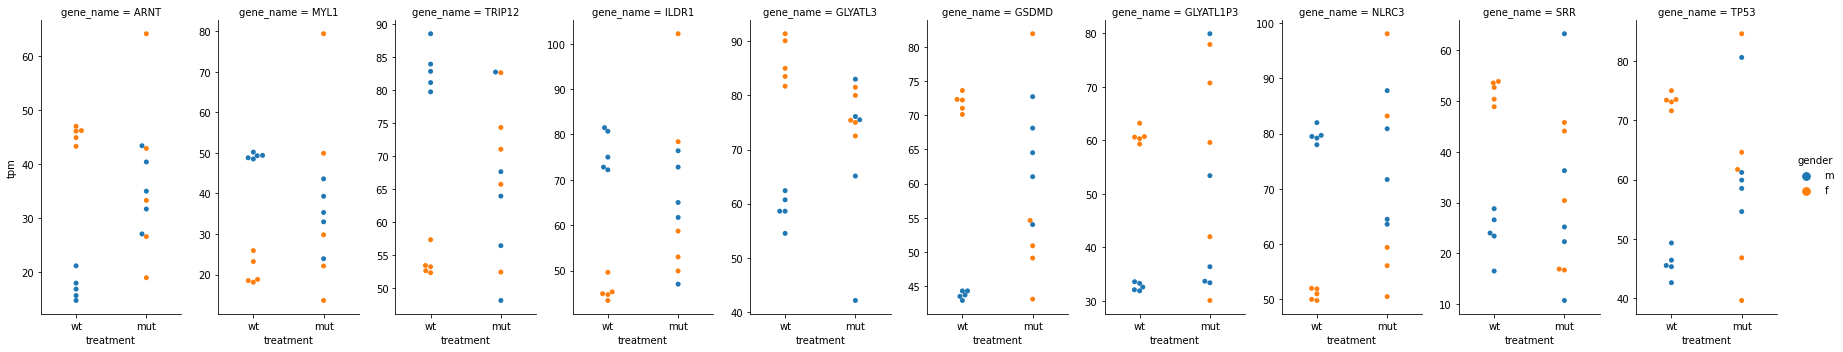

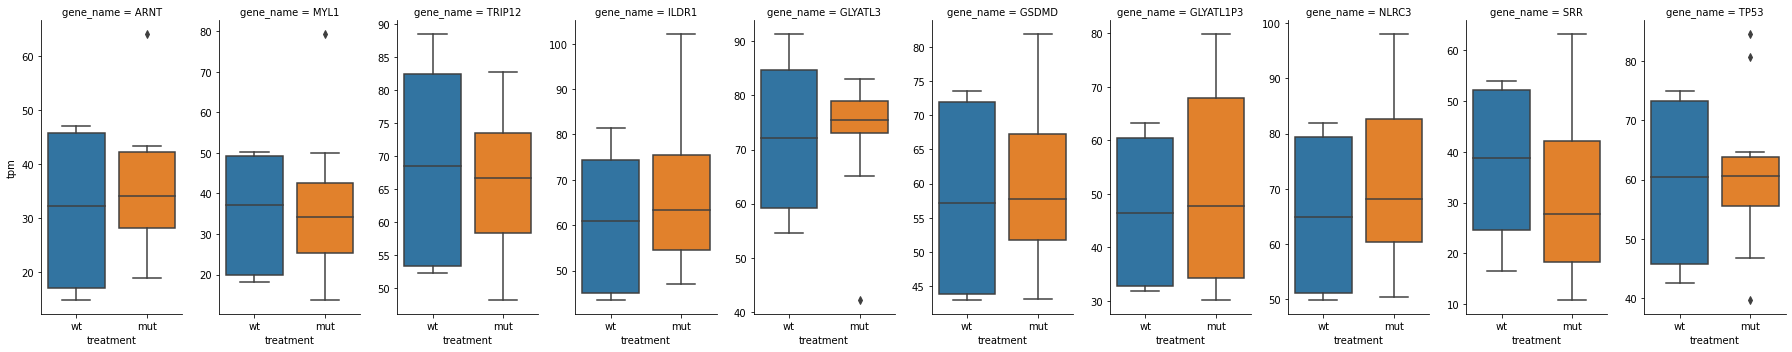

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

"""
The function produces side-by-side swarm plots for 10 random sample of genes plus Coriander
"""

ten_sample_gene_names = list(reservoir_sampling(42).keys()) + ['coriander']
def plot_gene_swarm_plot(sample_gene_names):
    sample_df = tidy_df_long.query("gene_name in @ten_sample_gene_names")

    sns.catplot(
        data=sample_df, kind="swarm",
        x="treatment", y="tpm", hue="gender", col="gene_name",
        aspect=.5,
        sharey=False
    )
def plot_gene_box_plot(sample_gene_names):
    sample_df = tidy_df_long.query("gene_name in @ten_sample_gene_names")

    sns.catplot(
        data=sample_df, kind="box",
        x="treatment", y="tpm", col="gene_name",
        aspect=.5,
        sharey=False
    )

mpl.rcParams['figure.facecolor'] = 'white'

plot_gene_swarm_plot(ten_sample_gene_names)
plot_gene_box_plot(ten_sample_gene_names)

### Above are the swarm plots of the 10 random sample of genes from w03-data.tbl plus Corriander itself, as well as corresponding boxplots the author would have produced.  My immediate observation is that for the wild type group in each gene, there are two pretty distinct clusters of expression levels based on gender. However, the same seperation by gender does not appear in the mutant group.The original author of the paper was not able to observe this discrepancy in genders because they only used box plots that are not subgrouped into gender. Swarmplots allow us to observe both potential patterns in the subgroups and individual data points. 



### After these exploratory observations, I first want to test the hypothesis that "loss of Coriander function results in no significant effects on the mean expression of any sand mouse gene transcript." To do this, we must perform 19990 t-tests comparing difference in means between wild type and the mutant type.

In [321]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

# get the data into the right format for t-tests
temp_df = tidy_df_long[tidy_df_long['gene_name'] != 'coriander']
temp_df = temp_df.groupby(['gene_name','treatment'])['tpm'].apply(list).to_dict()
t_test_df = pd.DataFrame.from_dict(temp_df, orient='index')
del temp_df

# Performing 19990 t-tests using a for loop and later adjust all p-values using Benjamini Hochberg's procedure.
p_values = []
for i in range(0,t_test_df.shape[0],2):
    p_values.append(stats.ttest_ind(t_test_df.iloc[i,0:9], t_test_df.iloc[i+1,0:9]).pvalue)
results1 = multipletests(np.array(p_values), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print('Total number of rejected null hypothesis:')
sum(results1[0])


Total number of rejected null hypothesis:


0

### 0 null hypothesis (no difference in mean expression level between wild type vs mutant) are rejected after performing 19990 t-tests. (p-values are adjusted for multiple testing through Benjamini-Hochberg's method). **These statistical tests supports the original conclusion by Lestrade et al. that there are no difference in mean expression level for other genes other than coriander itself.**

### However, recall I observed above that there are two pretty distinct clusters of expression levels based on gender in the wild type group, and this clear distinction fades in the mutant group. I want to first prove that there is difference in mean TPM based on gender in the wild type group, and this difference in mean TPM disappears in the mutant group. I decide to first perform 19990 (removing all coriander measurements) two-sided t tests to compare difference in mean TPM between male and female in the wild type group, and then repeat the process in the mutant group. 

### Performing 19990 two-sided independent t-tests of difference in means (mean_male - mean_female) for the wild type group while adjusting for false discovery rate using the Benjamini-Hochberg method:

In [322]:
from scipy import stats
from statsmodels.stats.multitest import multipletests
# get the data into the right format for t-tests
tidy_df_long = tidy_df_long[tidy_df_long['gene_name'] != 'coriander']
temp_df = tidy_df_long.query("treatment == 'wt'")
temp_df = temp_df.groupby(['gene_name','treatment','gender'])['tpm'].apply(list).to_dict()
t_test_df = pd.DataFrame.from_dict(temp_df, orient='index')
del temp_df
p_values = []

for i in range(0,t_test_df.shape[0],2):
    p_values.append(stats.ttest_ind(t_test_df.iloc[i,0:4], t_test_df.iloc[i+1,0:4]).pvalue)
results = multipletests(np.array(p_values), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print('Total number of rejected null hypothesis:')
sum(results[0])

Total number of rejected null hypothesis:


19990

Text(0.5, 1.0, 'Hist of adjust p-values in the WT Group')

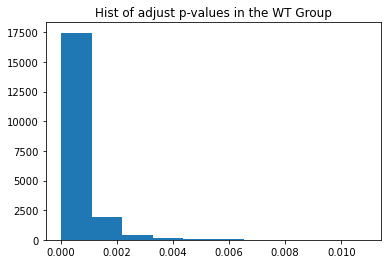

In [270]:
plt.hist(results[1])
plt.title("Hist of adjust p-values in the WT Group")

### We see that all 19990 adjust p-values were declared significant! The histogram shows that all adjusted p-values are under the cutoff of 0.05. Thus, I reject the null hypothesis that the mean TPM for male is the same as the mean TPM for female in the wild type group.

### Performing 19990 two-sided independent t-tests (mean_male - mean_female) for the mutant group while adjusting for false discovery rate using the Benjamini-Hochberg method:

In [324]:
tidy_df_long = tidy_df_long[tidy_df_long['gene_name'] != 'coriander']
temp_df = tidy_df_long.query("treatment == 'mut'")
temp_df = temp_df.groupby(['gene_name','treatment','gender'])['tpm'].apply(list).to_dict()
t_test_df = pd.DataFrame.from_dict(temp_df, orient='index')
del temp_df
p_values = []

for i in range(0,t_test_df.shape[0],2):
    p_values.append(stats.ttest_ind(t_test_df.iloc[i,0:4], t_test_df.iloc[i+1,0:4]).pvalue)
results2 = multipletests(np.array(p_values), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
print('Total number of rejected null hypothesis:')
sum(results2[0])

Total number of rejected null hypothesis:


0

Text(0.5, 1.0, 'Hist of adjust p-values in the MUT Group')

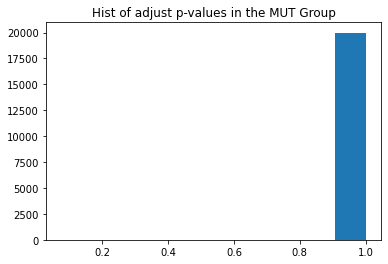

In [325]:
plt.hist(results2[1])
plt.title("Hist of adjust p-values in the MUT Group")

### We see that 0 adjust p-values were declared significant! The histogram shows that all adjusted p-values are near 1. Thus, I fail to reject the null hypothesis that the mean TPM for male is the same as the mean TPM for female in the wild type group.

### From the statistical tests I performed above, I strongly suspect that knocking out coriander changes the gender-based regulation of gene expression levels, **making the gene expression levels indistinguishable between genders in the mutant group**. 